# Part II - Registered Voter Participation in Union County, NC

## Clean and Explore Voter Demographics and Participation DataFrames for 2020, 2016, and 2012 General Elections

<font size=3rem>
    
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>

</font>

# OBTAIN

In [1]:
## Import functions made specifically for this project
from capstone_functions import *

## Import remaining necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from tzlocal import get_localzone
import plotly.express as px

In [2]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [3]:
## Whether or not to display all plotly figures
show_plotly = False

## Obtain 2020 Election

In [4]:
## Import and preview dataset
elec_2020_df = pd.read_csv('Data/UC_gen_2020.gz',
                     dtype={'voting_method': str})
elec_2020_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2020,vote_early,vote_by_mail,vote_curbside,Pri_2020,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
0,AA100547,0,65.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0
1,AA108801,0,57.0,NaN,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0
2,AA109481,0,47.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0
3,AA112504,0,72.0,NaN,No Vote,0.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0
4,AA114763,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0


## Obtain 2016 Election

In [5]:
## Import and preview dataset
elec_2016_df = pd.read_csv('Data/UC_gen_2016.gz',
                     dtype={'voting_method': str})
elec_2016_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2016,vote_early,vote_by_mail,vote_curbside,Pri_2016,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
0,AA100547,0,61.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0
1,AA108801,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0
2,AA112504,0,68.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0
3,AA114763,0,49.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0
4,AA118202,0,44.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0


## Obtain 2012 Election

In [6]:
## Import and preview dataset
elec_2012_df = pd.read_csv('Data/UC_gen_2012.gz',
                     dtype={'voting_method': str})
elec_2012_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2012,vote_early,vote_by_mail,vote_curbside,Pri_2012,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv
0,AA109481,0,39.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0
1,AA112504,0,64.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0
2,AA114763,0,45.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0
3,AA116927,0,50.0,IN-PERSON,Election Day,0.0,0.0,0.0,Election Day,REP,M,1962,2018-08-06,W,NL,28173.0,3513 MCPHERSON ST,WAXHAW,NY,Y,028D,028,9.0,20B,20C,35.0,68.0,6.0
4,AA118202,0,40.0,IN-PERSON,Election Day,0.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0


# SCRUB

## Scrub 2020 Election

In [7]:
## Check df metadata
elec_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168070 entries, 0 to 168069
Data columns (total 28 columns):
ncid                  168070 non-null object
no_vote_his           168070 non-null int64
birth_age_adj         168070 non-null float64
voting_method         131483 non-null object
Gen_2020              168070 non-null object
vote_early            168070 non-null float64
vote_by_mail          168070 non-null float64
vote_curbside         168070 non-null float64
Pri_2020              168070 non-null object
party_cd              168070 non-null object
gender_code           168070 non-null object
birth_year            168070 non-null int64
registr_dt            168070 non-null object
race_code             168070 non-null object
ethnic_code           168070 non-null object
zip_code              168067 non-null float64
res_street_address    168070 non-null object
res_city_desc         168067 non-null object
birth_state           127298 non-null object
drivers_lic           168070 no

> Columns with missing values:
* `voting_method`: missing values are all cases where the individual did not cast a vote in this election
* `zip_code`: investigate filling in the 3 missing values based on provided address
* `res_city_desc`: same as for `zip_code`
* `birth_state`: with so many values missing, probably want to make 'missing' its own category for this feature

> Column dtypes:
* `registr_dt`: recast as datetime
* `zip_code`: likely more useful to treat as a categorical variable rather than as numeric
* `drivers_lic`: change from Y or N to 1 or 0

In [8]:
## Change drivers_lic to binary indicator
elec_2020_df['drivers_lic_bin'] = np.where(elec_2020_df['drivers_lic']=='Y', 1, 0)

## Recast zip_code as category
elec_2020_df['zip_code'] = elec_2020_df['zip_code'].astype('category')

## Recast registr_dt as datetime variable
elec_2020_df['registr_dt'] = pd.to_datetime(elec_2020_df['registr_dt'])

## Fill null values in voting_method with 'No Vote'
elec_2020_df['voting_method'].fillna(value='No Vote', inplace=True)

## Fill null values in birth_state with 'Missing'
elec_2020_df['birth_state'].fillna(value='Missing', inplace=True)

## Check records with missing zip_code
elec_2020_df.loc[elec_2020_df['zip_code'].isna()]

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2020,vote_early,vote_by_mail,vote_curbside,Pri_2020,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin
66460,EF173508,0,26.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Early,REP,M,1994,2016-09-26,W,UN,NaN,CONFIDENTIAL,NaN,NC,Y,017A,017A,9.0,20B,20C,35.0,68.0,3.0,1
84648,EF203192,0,59.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,UNA,F,1961,2016-05-25,W,NL,NaN,CONFIDENTIAL,NaN,PA,Y,029C,029C,9.0,20B,20C,35.0,68.0,5.0,1
123136,EF35182,0,62.0,No Vote,No Vote,0.0,0.0,0.0,No Vote,REP,F,1958,1991-03-15,W,NL,NaN,CONFIDENTIAL,NaN,NC,Y,030,030,9.0,20B,20C,35.0,69.0,1.0,1


> These three records missing `zip_code` also correspond to the three records missing `res_city_desc`, most likely because the residential address is confidential for these individuals. These records will be lumped under the 'Other' category for the less frequently appearing cities created to avoid issues with high cardinality and rare labels.

## Scrub 2016 Election

In [9]:
## Check df metadata
elec_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123222 entries, 0 to 123221
Data columns (total 28 columns):
ncid                  123222 non-null object
no_vote_his           123222 non-null int64
birth_age_adj         123222 non-null float64
voting_method         102225 non-null object
Gen_2016              123222 non-null object
vote_early            123222 non-null float64
vote_by_mail          123222 non-null float64
vote_curbside         123222 non-null float64
Pri_2016              123222 non-null object
party_cd              123222 non-null object
gender_code           123222 non-null object
birth_year            123222 non-null int64
registr_dt            123222 non-null object
race_code             123222 non-null object
ethnic_code           123222 non-null object
zip_code              123219 non-null float64
res_street_address    123222 non-null object
res_city_desc         123219 non-null object
birth_state           94850 non-null object
drivers_lic           123222 non

> Columns with missing values:
* `voting_method`: missing values are all cases where the individual did not cast a vote in this election
* `zip_code`: investigate filling in the 3 missing values based on provided address
* `res_city_desc`: same as for `zip_code`
* `birth_state`: with so many values missing, probably want to make 'missing' its own category for this feature

> Column dtypes:
* `registr_dt`: recast as datetime
* `zip_code`: likely more useful to treat as a categorical variable rather than as numeric
* `drivers_lic`: change from Y or N to 1 or 0

In [10]:
## Change drivers_lic to binary indicator
elec_2016_df['drivers_lic_bin'] = np.where(elec_2016_df['drivers_lic']=='Y', 1, 0)

## Recast zip_code as category
elec_2016_df['zip_code'] = elec_2016_df['zip_code'].astype('category')

## Recast registr_dt as datetime variable
elec_2016_df['registr_dt'] = pd.to_datetime(elec_2016_df['registr_dt'])

## Fill null values in voting_method with 'No Vote'
elec_2016_df['voting_method'].fillna(value='No Vote', inplace=True)

## Fill null values in birth_state with 'Missing'
elec_2016_df['birth_state'].fillna(value='Missing', inplace=True)

## Check records with missing zip_code
elec_2016_df.loc[elec_2016_df['zip_code'].isna()]

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2016,vote_early,vote_by_mail,vote_curbside,Pri_2016,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin
59612,EF173508,0,22.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,M,1994,2016-09-26,W,UN,NaN,CONFIDENTIAL,NaN,NC,Y,017A,017A,9.0,20B,20C,35.0,68.0,3.0,1
77543,EF203192,0,55.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,UNA,F,1961,2016-05-25,W,NL,NaN,CONFIDENTIAL,NaN,PA,Y,029C,029C,9.0,20B,20C,35.0,68.0,5.0,1
88945,EF35182,0,58.0,No Vote,No Vote,0.0,0.0,0.0,No Vote,REP,F,1958,1991-03-15,W,NL,NaN,CONFIDENTIAL,NaN,NC,Y,030,030,9.0,20B,20C,35.0,69.0,1.0,1


> These three records missing `zip_code` also correspond to the three records missing `res_city_desc`, most likely because the residential address is confidential for these individuals. These records will be lumped under the 'Other' category for the less frequently appearing cities created to avoid issues with high cardinality and rare labels.

## Scrub 2012 Election

In [11]:
## Check df metadata
elec_2012_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96275 entries, 0 to 96274
Data columns (total 28 columns):
ncid                  96275 non-null object
no_vote_his           96275 non-null int64
birth_age_adj         96275 non-null float64
voting_method         86494 non-null object
Gen_2012              96275 non-null object
vote_early            96275 non-null float64
vote_by_mail          96275 non-null float64
vote_curbside         96275 non-null float64
Pri_2012              96275 non-null object
party_cd              96275 non-null object
gender_code           96275 non-null object
birth_year            96275 non-null int64
registr_dt            96275 non-null object
race_code             96275 non-null object
ethnic_code           96275 non-null object
zip_code              96273 non-null float64
res_street_address    96275 non-null object
res_city_desc         96273 non-null object
birth_state           71418 non-null object
drivers_lic           96275 non-null object
precinct

> Columns with missing values:
* `voting_method`: missing values are all cases where the individual did not cast a vote in this election
* `zip_code`: investigate filling in the 2 missing values based on provided address
* `res_city_desc`: same as for `zip_code`
* `birth_state`: with so many values missing, probably want to make 'missing' its own category for this feature

> Column dtypes:
* `registr_dt`: recast as datetime
* `zip_code`: likely more useful to treat as a categorical variable rather than as numeric
* `drivers_lic`: change from Y or N to 1 or 0

In [12]:
## Change drivers_lic to binary indicator
elec_2012_df['drivers_lic_bin'] = np.where(elec_2012_df['drivers_lic']=='Y', 1, 0)

## Recast zip_code as category
elec_2012_df['zip_code'] = elec_2012_df['zip_code'].astype('category')

## Recast registr_dt as datetime variable
elec_2012_df['registr_dt'] = pd.to_datetime(elec_2012_df['registr_dt'])

## Fill null values in voting_method with 'No Vote'
elec_2012_df['voting_method'].fillna(value='No Vote', inplace=True)

## Fill null values in birth_state with 'Missing'
elec_2012_df['birth_state'].fillna(value='Missing', inplace=True)

## Check records with missing zip_code
elec_2012_df.loc[elec_2012_df['zip_code'].isna()]

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2012,vote_early,vote_by_mail,vote_curbside,Pri_2012,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin
55482,EF173508,0,18.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,M,1994,2016-09-26,W,UN,NaN,CONFIDENTIAL,NaN,NC,Y,017A,017A,9.0,20B,20C,35.0,68.0,3.0,1
67409,EF35182,0,54.0,TRANSFER,Other,0.0,0.0,0.0,No Vote,REP,F,1958,1991-03-15,W,NL,NaN,CONFIDENTIAL,NaN,NC,Y,030,030,9.0,20B,20C,35.0,69.0,1.0,1


> These 2 records missing `zip_code` also correspond to the three records missing `res_city_desc`, most likely because the residential address is confidential for these individuals. These records will be lumped under the 'Other' category for the less frequently appearing cities created to avoid issues with high cardinality and rare labels.

# EXPLORE

## Explore 2020 Election

### 2020 Categorical Variables

In [13]:
check_unique('voting_method', elec_2020_df)

,count,%
ABSENTEE ONESTOP,88137,52.44
No Vote,36587,21.77
IN-PERSON,19813,11.79
ABSENTEE BY MAIL,19647,11.69
ABSENTEE CURBSIDE,2951,1.76
PROVISIONAL,380,0.23
TRANSFER,353,0.21
CURBSIDE,202,0.12


> Almost as many people who voted in person on election day voted by mail, suggesting mail-in votes may be better treated as a separate category for the 2020 election. This would also help to break down the majority class of 'Early' to represent a smaller portion of the whole. Below I create a new column 'vote_cat'.

In [14]:
## Group original vote methods into more general categories in a new variable
 # Map the original categories to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Mail',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Apply the map to create new vote_method_cat column
elec_2020_df['vote_cat'] = elec_2020_df['voting_method'].map(vote_method_map)

check_unique('vote_cat', elec_2020_df)

check_unique('Gen_2020', elec_2020_df)

,count,%
Early,110735,65.89
No Vote,36587,21.77
Election Day,20015,11.91
Other,733,0.44


> The 'Other' category is made up of only 733 individuals that voted with either a provisional or transfer ballot. Need to consider dropping this extremely rare category or somehow adding those records into one of the other categories.

In [15]:
check_unique('Pri_2020', elec_2020_df)

,count,%
No Vote,124810,74.26
Election Day,25825,15.37
Early,17122,10.19
Other,313,0.19


> 'Other' category also extremely rare for `Pri_2020` as well. If this is used as a predictor, consider changing to a binary variable indicating simply whether or not the person voted in the Primary.

In [16]:
check_unique('party_cd', elec_2020_df)

,count,%
REP,69079,41.10
UNA,57488,34.20
DEM,40340,24.00
LIB,995,0.59
CST,96,0.06
GRE,72,0.04


> LIB, CST, and GRE extremely rare within the county. Need to deal with this in some way, but grouping into a single 'Rare' category won't necessarily solve the issue since that would still represent barely more than 0.5% of voters in this election. It could make sense to combine these three parties with UNA (unaffiliated) to simply represent voters that do not align with one of the two major parties.

In [17]:
check_unique('gender_code', elec_2020_df)

,count,%
F,80522,47.91
M,72454,43.11
U,15094,8.98


In [18]:
check_unique('race_code', elec_2020_df)

,count,%
W,119683,71.21
B,19182,11.41
U,18823,11.20
O,6115,3.64
A,2930,1.74
M,905,0.54
I,426,0.25
P,6,0.00


> The most infrequent categories (Other, Asian, Multiple, Native American, Pacific Islander/Native Hawaiian) each represent less than 5% of voters. To deal with these rare labels, it is probably best from a modeling standpoint to group them all under 'Other'.

In [19]:
check_unique('ethnic_code', elec_2020_df)

,count,%
NL,123992,73.77
UN,37163,22.11
HL,6915,4.11


> Voters that chose to identify themselves as Hispanic or Latino represent less than 5% of voters. Check below to see how disclosed racial and ethnic identities intersect.

In [20]:
## Investigate how race intersects with ethnic code
for code in elec_2020_df['ethnic_code'].unique():
    print('*****{}*****'.format(code))
    display(elec_2020_df.loc[elec_2020_df['ethnic_code']==code]['race_code'].value_counts().to_frame())
    print()

*****UN*****


,race_code
U,16769
W,14871
B,3931
A,810
O,464
M,228
I,87
P,3



*****NL*****


,race_code
W,103316
B,15162
O,2312
A,2110
U,383
M,380
I,328
P,1



*****HL*****


,race_code
O,3339
U,1671
W,1496
M,297
B,89
I,11
A,10
P,2


> Patterns of intersection between race and ethnicity are somewhat unclear. The majority of voters that chose not to disclose their race also chose not to disclose their ethnicity (16,769 out of 37,163). The majority of voters that identified themselves as Hispanic or Latino when registering listed their race as 'Other'(3,339 out of 6,915), with the next most frequent category being 'Undesignated' (1,671 out of 6,915), then 'White' (1,496 out of 6,915). As such, I am uncertain how useful this feature will be as a predictor, especially given that the 'HL' category is so rare.

In [21]:
check_unique('zip_code', elec_2020_df)

,count,%
28173.0,47609,28.33
28110.0,34719,20.66
28079.0,28195,16.78
28104.0,25603,15.23
28112.0,18032,10.73
28103.0,7299,4.34
28174.0,5734,3.41
28227.0,396,0.24
28105.0,237,0.14
28133.0,155,0.09


> Seven of the 12 zip codes are rare labels (each representing less than 5% of the voters). It may be best to use grouped cities as a predictor (see immediately below) rather than zip codes, especially since the two will be highly correlated.

In [22]:
check_unique('res_city_desc', elec_2020_df)

,count,%
MONROE,52751,31.39
WAXHAW,47609,28.33
INDIAN TRAIL,28195,16.78
MATTHEWS,25840,15.37
MARSHVILLE,7299,4.34
WINGATE,5734,3.41
CHARLOTTE,396,0.24
PEACHLAND,155,0.09
MIDLAND,86,0.05
NaN,3,0.00


> There are several rare labels, so if `res_city_desc` is to be used as a predictor, cities besides Monroe, Waxhaw, Indian Trail, and Matthews should probably be combined into an 'Other' category.

In [23]:
check_unique('birth_state', elec_2020_df)

,count,%
NC,46367,27.59
Missing,40772,24.26
NY,13211,7.86
OC,10042,5.97
SC,4753,2.83
NJ,4492,2.67
OH,4336,2.58
PA,4334,2.58
FL,3786,2.25
CA,3351,1.99


> The majority of `birth_state` labels are rare categories (less than 5% of voters). Some of the codes do not appear to be U.S. states or territories. These rare labels could be dealt with in a couple ways. They could all be grouped into an 'Other' category, or they could be grouped according to geographic region of the U.S. with an additional category for naturalized U.S. citizens.

In [24]:
check_unique('drivers_lic', elec_2020_df)

,count,%
Y,152984,91.02
N,15086,8.98


### 2020 Group Rare Categories

In [25]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2020 election or not
elec_2020_df['Gen_2020_binary'] = np.where(elec_2020_df['Gen_2020']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Gen_2020_binary', elec_2020_df)

,count,%
1,131483,78.23
0,36587,21.77


In [26]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2020 election or not
elec_2020_df['Pri_2020_binary'] = np.where(elec_2020_df['Pri_2020']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Pri_2020_binary', elec_2020_df)

,count,%
0,124810,74.26
1,43260,25.74


In [27]:
## Create new column grouping most infrequent party categories (<5% of voters)
  ## into same group as those who are unaffiliated
elec_2020_df['party_grp'] = np.where(elec_2020_df['party_cd'].isin(['REP', 'DEM']),
                                elec_2020_df['party_cd'].str.title(), 'Other')

## Check distribution
check_unique('party_grp', elec_2020_df)

,count,%
Rep,69079,41.1
Other,58651,34.9
Dem,40340,24.0


In [28]:
## Create new column grouping most infrequent race categories (<5% of voters)
elec_2020_df['race_grp'] = np.where(elec_2020_df['race_code'].isin(['W', 'B', 'U']),
                               elec_2020_df['race_code'], 'O')
race_grp_map = {'W': 'White',
                'B': 'Black',
                'U': 'Undesig.',
                'O': 'Other'}
elec_2020_df['race_grp'] = elec_2020_df['race_grp'].map(race_grp_map)

## Check distribution
check_unique('race_grp', elec_2020_df)

,count,%
White,119683,71.21
Black,19182,11.41
Undesig.,18823,11.20
Other,10382,6.18


In [29]:
## Create new column grouping most infrequent cities (<5% of voters)
elec_2020_df['city_grp'] = np.where(elec_2020_df['res_city_desc'].isin(['MONROE', 
                                                              'WAXHAW',
                                                              'INDIAN TRAIL',
                                                              'MATTHEWS']),
                                elec_2020_df['res_city_desc'].str.title(), 'Other')

## Check distribution
check_unique('city_grp', elec_2020_df)

,count,%
Monroe,52751,31.39
Waxhaw,47609,28.33
Indian Trail,28195,16.78
Matthews,25840,15.37
Other,13675,8.14


In [30]:
## Create a function for grouping birth_state into U.S. Census regions, 
  ## also lumping territories and out of country into 'Other'
def get_birth_reg_census_other(state):
    
    if state in ['AS', 'GU', 'MP', 'PR', 'VI', 'OC']:
        return 'Other'
    
    # the rest of the categories are based on U.S. Census Bureau regions
    elif state in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT',
                     'NJ', 'NY', 'PA']:
        return 'Northeast'
    
    elif state in ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 
                     'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR',
                     'LA', 'OK', 'TX']:
        return 'South'
    
    elif state in ['IL', 'IN', 'MI', 'OH', 'WI',
                     'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']:
        return 'Midwest'
    
    elif state in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT',
                     'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
        return 'West'
    
    else:
        return 'Missing'

## Create a new column grouping birth_state into U.S. Census regions,
  ## this time lumping territories and out of country into 'Other'
elec_2020_df['birth_reg_other'] = elec_2020_df['birth_state'].apply(get_birth_reg_census_other)
check_unique('birth_reg_other', elec_2020_df)

,count,%
South,70810,42.13
Missing,40773,24.26
Northeast,26291,15.64
Midwest,13749,8.18
Other,10535,6.27
West,5912,3.52


### 2020 Numeric Variables

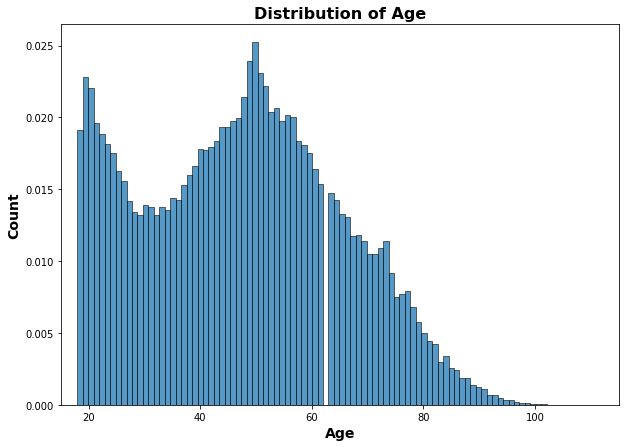

In [31]:
## Plot distribution of current age as of EOY 2020 
plt.figure(figsize=(10,7))
ax = sns.histplot(elec_2020_df['birth_age_adj'], stat='density')
ax.set_title('Distribution of Age', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlim(15,115);

### 2020 Bin Age into Generation Categories

In [32]:
## Create a function for grouping birth_year into generations
def get_generation(birth_year):
    
    if birth_year <= 1924:
        return 'Greatest'
    
    elif (birth_year > 1923) & (birth_year < 1946):
        return 'Silent'
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'

## Create a a new column grouping birth_year into generations
elec_2020_df['generation'] = elec_2020_df['birth_year'].apply(get_generation)
check_unique('generation', elec_2020_df)

,count,%
GenX,53717,31.96
Boomer,44171,26.28
Millennial,38600,22.97
GenZ,19834,11.80
Silent,11595,6.90
Greatest,153,0.09


In [33]:
## Create a function for grouping birth_year into generations, 
  ## also lumping Silent in with Greatest
def get_gen_grp(birth_year):
    
    if birth_year < 1946:
        return 'Greatest-Silent'
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'

## Create a new column grouping birth_year into generations, 
  ## also lumping Silent in with Greatest
elec_2020_df['gen_grp'] = elec_2020_df['birth_year'].apply(get_gen_grp)
check_unique('gen_grp', elec_2020_df)

,count,%
GenX,53717,31.96
Boomer,44171,26.28
Millennial,38600,22.97
GenZ,19834,11.80
Greatest-Silent,11748,6.99


### 2020 Load in Full Clean Dataset

In [34]:
## Import and preview dataset
elec_2020_df = pd.read_csv('Data/UC_gen_2020_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'vtd_abbrv': str
                             })
elec_2020_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2020,vote_early,vote_by_mail,vote_curbside,Pri_2020,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin,vote_cat,Gen_2020_binary,Pri_2020_binary,party_grp,race_grp,city_grp,birth_reg_other,generation,gen_grp
0,AA100547,0,65.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0,1,Early,1,1,Rep,White,Indian Trail,South,Boomer,Boomer
1,AA108801,0,57.0,No Vote,No Vote,0.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0,1,No Vote,0,0,Other,White,Waxhaw,Northeast,Boomer,Boomer
2,AA109481,0,47.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0,1,Early,1,0,Dem,White,Waxhaw,Midwest,GenX,GenX
3,AA112504,0,72.0,No Vote,No Vote,0.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0,1,No Vote,0,0,Rep,White,Monroe,Northeast,Boomer,Boomer
4,AA114763,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0,1,Early,1,1,Dem,Black,Matthews,South,GenX,GenX


### 2020 Registered Voter Population Summary

In [35]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'Gen_2020',
                  title='Distribution of Voting Methods in 2020 Election'))

In [36]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'Gen_2020',
              title='Voting Methods in 2020 Election'))

In [37]:
if show_plotly:
    fig = px.histogram(elec_2020_df, x='birth_age_adj', nbins=50,
                       title='Distribution of Registered Voters by Age in 2020 Election',
                       labels={'birth_age_adj': 'Age'},
                       template='seaborn'
                      )
    
    fig.show()

In [38]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'gen_grp',
              title='Distribution of Registered Voters by Generation in 2020 Election'))

In [39]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'gen_grp',
              title='Registered Voters by Generation in 2020 Election'))

In [40]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'party_grp',
              title='Distribution of Registered Voters by Party Affiliation in 2020 Election'))

In [41]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'party_grp',
              title='Registered Voters by Party Affiliation in 2020 Election'))

In [42]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'race_grp',
              title='Distribution of Registered Voters by Race in 2020 Election'))

In [43]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'race_grp',
              title='Registered Voters by Race in 2020 Election'))

In [44]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'gender_code',
              title='Distribution of Registered Voters by Gender in 2020 Election'))

In [45]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'gender_code',
              title='Registered Voters by Gender in 2020 Election'))

In [46]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'birth_reg_other',
              title='Distribution of Registered Voters by Birth Region in 2020 Election'))

In [47]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'birth_reg_other',
              title='Registered Voters by Birth Region in 2020 Election'))

In [48]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'drivers_lic',
              title='Distribution of Registered Voters by Drivers License Possession in 2020 Election'))

In [49]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'drivers_lic',
              title='Possession of Drivers License by Registered Voters in 2020 Election'))

In [50]:
if show_plotly:
    display(basic_px_hist(elec_2020_df, 2020, 'city_grp',
              title='Distribution of Registered Voters by City in 2020 Election'))

In [51]:
if show_plotly:
    display(basic_pie(elec_2020_df, 2020, 'city_grp',
              title='Registered Voters by City in 2020 Election'))

### 2020 Relationship to Voting Method

#### 2020 By Age

In [52]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'birth_age_adj', 'Gen_2020', 
            title='Distribution of Voter Age by Voting Method in 2020 Election'))

In [53]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'gen_grp', 'Gen_2020', 
            title='Voting Method by Generation'))

In [54]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gen_grp', 'Early',
              title='Early Voters by Generation'))

In [55]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gen_grp', 'Election Day',
              title='Election Day Voters by Generation'))

In [56]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gen_grp', 'No Vote',
              title='Non-Voters by Generation'))

In [57]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gen_grp', 'Other',
              title='Provisional/ Transfer Voters by Generation'))

In [58]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gen_grp', 'Gen_2020', 'GenZ',
              title='Votes by Gen Z'))

In [59]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gen_grp', 'Gen_2020', 'Millennial',
              title='Votes by Millennials'))

In [60]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gen_grp', 'Gen_2020', 'GenX',
              title='Votes by Generation X'))

In [61]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gen_grp', 'Gen_2020', 'Boomer',
              title='Votes by Baby Boomers'))

In [62]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gen_grp', 'Gen_2020', 'Greatest-Silent',
              title='Votes by Greatest and Silent Generation'))

#### 2020 By Party

In [63]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'Gen_2020', 'party_grp', 
            title='Voting Method by Party'))

In [64]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'party_grp', 'Early',
              title='Early Voters by Party'))

In [65]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'party_grp', 'Election Day',
              title='Election Day Voters by Party'))

In [66]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'party_grp', 'No Vote',
              title='Non-Voters by Party'))

In [67]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'party_grp', 'Other',
              title='Provisional/ Transfer Voters by Party'))

In [68]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'party_grp', 'Gen_2020', 'Dem',
              title='Votes by Democratic Party'))

In [69]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'party_grp', 'Gen_2020', 'Rep',
              title='Votes by Republican Party'))

In [70]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'party_grp', 'Gen_2020', 'Other',
              title='Votes by Other Voters'))

#### 2020 By Race

In [71]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'Gen_2020', 'race_grp',
            title='Voting Method by Race'))

In [72]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'race_grp', 'Early',
              title='Early Voters by Race'))

In [73]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'race_grp', 'Election Day',
              title='Election Day Voters by Race'))

In [74]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'race_grp', 'No Vote',
              title='Non-Voters by Race'))

In [75]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'race_grp', 'Other',
              title='Provisional/ Transfer Voters by Race'))

In [76]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'race_grp', 'Gen_2020', 'White',
              title='Votes by White Voters'))

In [77]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'race_grp', 'Gen_2020', 'Black',
              title='Votes by Black Voters'))

In [78]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'race_grp', 'Gen_2020', 'Undesig.',
              title='Votes by Voters of Undesignated Race'))

In [79]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'race_grp', 'Gen_2020', 'Other',
              title='Votes by Voters of Other Racial Backgrounds'))

#### 2020 By Gender

In [80]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'Gen_2020', 'gender_code', 
            title='Voting Method by Gender'))

In [81]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gender_code', 'Early',
              title='Early Voters by Gender'))

In [82]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gender_code', 'Election Day',
              title='Election Day Voters by Gender'))

In [83]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gender_code', 'No Vote',
              title='Non-Voters by Gender'))

In [84]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'gender_code', 'Other',
              title='Provisional/ Transfer Voters by Gender'))

In [85]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gender_code', 'Gen_2020', 'F',
              title='Votes by Women'))

In [86]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gender_code', 'Gen_2020', 'M',
              title='Votes by Men'))

In [87]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'gender_code', 'Gen_2020', 'U',
              title='Votes by Voters of Undesignated Gender'))

#### 2020 By Birth Region

In [88]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'Gen_2020', 'birth_reg_other', 
            title='Voting Method by Birth Region'))

In [89]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'birth_reg_other', 'Early',
              title='Early Voters by Birth Region'))

In [90]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'birth_reg_other', 'Election Day',
              title='Election Day Voters by Birth Region'))

In [91]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'birth_reg_other', 'No Vote',
              title='Non-Voters by Birth Region'))

In [92]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'birth_reg_other', 'Other',
              title='Provisional/ Transfer Voters by Birth Region'))

In [93]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'birth_reg_other', 'Gen_2020', 'South',
              title='Votes by Voters from the South'))

In [94]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'birth_reg_other', 'Gen_2020', 'Missing',
              title='Votes by Voters with Missing Birth Region'))

In [95]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'birth_reg_other', 'Gen_2020', 'Northeast',
              title='Votes by Voters from the Northeast'))

In [96]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'birth_reg_other', 'Gen_2020', 'Midwest',
              title='Votes by Voters from the Midwest'))

In [97]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'birth_reg_other', 'Gen_2020', 'Other',
              title='Votes by Voters Born in U.S. Territories or Outside the U.S.'))

In [98]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'birth_reg_other', 'Gen_2020', 'West',
              title='Votes by Voters from the West'))

#### 2020 By Possessing a Drivers License

In [99]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'Gen_2020', 'drivers_lic', 
            title='Voting Method by Voters with and without Drivers Licenses'))

In [100]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'drivers_lic', 'Early',
              title='Early Voters by Possession of Drivers License'))

In [101]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'drivers_lic', 'Election Day',
              title='Election Day Voters by Possession of Drivers License'))

In [102]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'drivers_lic', 'No Vote',
              title='Non-Voters by Possession of Drivers License'))

In [103]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'drivers_lic', 'Other',
              title='Provisional/ Transfer Voters by Possession of Drivers License'))

In [104]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'drivers_lic', 'Gen_2020', 'Y',
              title='Votes by People with a Drivers License'))

In [105]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'drivers_lic', 'Gen_2020', 'N',
              title='Votes by People with No Drivers License'))

#### 2020 By City

In [106]:
if show_plotly:
    display(grp_px_hist(elec_2020_df, 2020, 'Gen_2020', 'city_grp', 
            title='Voting Method by City of Residence'))

In [107]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'city_grp', 'Early',
              title='Early Voters by City of Residence'))

In [108]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'city_grp', 'Election Day',
              title='Election Day Voters by City of Residence'))

In [109]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'city_grp', 'No Vote',
              title='Non-Voters by City of Residence'))

In [110]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'Gen_2020', 'city_grp', 'Other',
              title='Provisional/ Transfer Voters by City of Residence'))

In [111]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'city_grp', 'Gen_2020', 'Monroe',
              title='Votes by Residents of Monroe'))

In [112]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'city_grp', 'Gen_2020', 'Waxhaw',
              title='Votes by Residents of Waxhaw'))

In [113]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'city_grp', 'Gen_2020', 'Indian Trail',
              title='Votes by Residents of Indian Trail'))

In [114]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'city_grp', 'Gen_2020', 'Matthews',
              title='Votes by Residents of Matthews'))

In [115]:
if show_plotly:
    display(grp_pie(elec_2020_df, 2020, 'city_grp', 'Gen_2020', 'Other',
              title='Votes from Other Cities in Union County'))

## Explore 2016 Election

### 2016 Categorical Variables

In [116]:
check_unique('voting_method', elec_2016_df)

,count,%
ABSENTEE ONESTOP,67085,54.44
IN-PERSON,29688,24.09
No Vote,20997,17.04
ABSENTEE BY MAIL,3604,2.92
TRANSFER,701,0.57
ABSENTEE CURBSIDE,546,0.44
PROVISIONAL,460,0.37
CURBSIDE,141,0.11


In [117]:
## Group original vote methods into more general categories in a new variable
 # Map the original categories to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Mail',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Apply the map to create new vote_method_cat column
elec_2016_df['vote_cat'] = elec_2016_df['voting_method'].map(vote_method_map)

check_unique('vote_cat', elec_2016_df)

,count,%
Early,67631,54.89
Election Day,29829,24.21
No Vote,20997,17.04
Mail,3604,2.92
Other,1161,0.94


In [118]:
check_unique('Gen_2016', elec_2016_df)

,count,%
Early,71235,57.81
Election Day,29829,24.21
No Vote,20997,17.04
Other,1161,0.94


> The 'Other' category is made up of only 1,161 individuals that voted with either a provisional or transfer ballot. Need to consider dropping this extremely rare category or somehow adding those records into one of the other categories.

In [119]:
check_unique('Pri_2016', elec_2016_df)

,count,%
No Vote,79340,64.39
Election Day,29742,24.14
Early,13250,10.75
Other,890,0.72


> 'Other' category also extremely rare for `Pri_2016` as well. If this is used as a predictor, consider changing to a binary variable indicating simply whether or not the person voted in the Primary.

In [120]:
check_unique('party_cd', elec_2016_df)

,count,%
REP,53497,43.42
UNA,39124,31.75
DEM,29957,24.31
LIB,580,0.47
CST,44,0.04
GRE,20,0.02


> LIB, CST, and GRE extremely rare within the county. Need to deal with this in some way, but grouping into a single 'Rare' category won't necessarily solve the issue since that would still represent barely more than 0.5% of voters in this election. It could make sense to combine these three parties with UNA (unaffiliated) to simply represent voters that do not align with one of the two major parties.

In [121]:
check_unique('gender_code', elec_2016_df)

,count,%
F,62865,51.02
M,55183,44.78
U,5174,4.20


In [122]:
check_unique('race_code', elec_2016_df)

,count,%
W,94971,77.07
B,14892,12.09
U,7029,5.70
O,3707,3.01
A,1689,1.37
M,624,0.51
I,308,0.25
P,2,0.00


> The most infrequent categories (Other, Asian, Multiple, Native American, Pacific Islander/Native Hawaiian) each represent less than 5% of voters. To deal with these rare labels, it is probably best from a modeling standpoint to group them all under 'Other'.

In [123]:
check_unique('ethnic_code', elec_2016_df)

,count,%
NL,98402,79.86
UN,20701,16.80
HL,4119,3.34


> Voters that chose to identify themselves as Hispanic or Latino represent less than 5% of voters. Check below to see how disclosed racial and ethnic identities intersect.

In [124]:
## Investigate how race intersects with ethnic code
for code in elec_2016_df['ethnic_code'].unique():
    print('*****{}*****'.format(code))
    display(elec_2016_df.loc[elec_2016_df['ethnic_code']==code]['race_code'].value_counts().to_frame())
    print()

*****UN*****


,race_code
W,10782
U,6098
B,2908
A,480
O,214
M,160
I,58
P,1



*****NL*****


,race_code
W,83152
B,11922
O,1427
A,1203
M,274
I,242
U,181
P,1



*****HL*****


,race_code
O,2066
W,1037
U,750
M,190
B,62
I,8
A,6


> Patterns of intersection between race and ethnicity are somewhat unclear. The majority of voters that chose not to disclose their ethnicity were white (10,782 out of 20,701). The majority of voters that identified themselves as Hispanic or Latino when registering listed their race as 'Other'(2,066 out of 4,119), with the next most frequent category being 'White' (1,037 out of 4,119), then 'Undesignated' (750 out of 4,119). As such, I am uncertain how useful this feature will be as a predictor, especially given that the 'HL' category is so rare.

In [125]:
check_unique('zip_code', elec_2016_df)

,count,%
28173.0,33068,26.84
28110.0,26041,21.13
28079.0,20304,16.48
28104.0,18875,15.32
28112.0,14207,11.53
28103.0,5841,4.74
28174.0,4205,3.41
28227.0,298,0.24
28105.0,183,0.15
28133.0,128,0.10


> Seven of the 12 zip codes are rare labels (each representing less than 5% of the voters). It may be best to use grouped cities as a predictor (see immediately below) rather than zip codes, especially since the two will be highly correlated.

In [126]:
check_unique('res_city_desc', elec_2016_df)

,count,%
MONROE,40248,32.66
WAXHAW,33068,26.84
INDIAN TRAIL,20304,16.48
MATTHEWS,19058,15.47
MARSHVILLE,5841,4.74
WINGATE,4205,3.41
CHARLOTTE,298,0.24
PEACHLAND,128,0.10
MIDLAND,67,0.05
NaN,3,0.00


> There are several rare labels, so if `res_city_desc` is to be used as a predictor, cities besides Monroe, Waxhaw, Indian Trail, and Matthews should probably be combined into an 'Other' category.

In [127]:
check_unique('birth_state', elec_2016_df)

,count,%
NC,35549,28.85
Missing,28372,23.03
NY,9812,7.96
OC,6553,5.32
SC,3743,3.04
OH,3401,2.76
PA,3385,2.75
NJ,3311,2.69
FL,2636,2.14
CA,2270,1.84


> The majority of `birth_state` labels are rare categories (less than 5% of voters). Some of the codes do not appear to be U.S. states or territories. These rare labels could be dealt with in a couple ways. They could all be grouped into an 'Other' category, or they could be grouped according to geographic region of the U.S. with an additional category for naturalized U.S. citizens.

In [128]:
check_unique('drivers_lic', elec_2016_df)

,count,%
Y,113301,91.95
N,9921,8.05


### 2016 Group Rare Categories

In [129]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2016 election or not
elec_2016_df['Gen_2016_binary'] = np.where(elec_2016_df['Gen_2016']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Gen_2016_binary', elec_2016_df)

,count,%
1,102225,82.96
0,20997,17.04


In [130]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2016 election or not
elec_2016_df['Pri_2016_binary'] = np.where(elec_2016_df['Pri_2016']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Pri_2016_binary', elec_2016_df)

,count,%
0,79340,64.39
1,43882,35.61


In [131]:
## Create new column grouping most infrequent party categories (<5% of voters)
  ## into same group as those who are unaffiliated
elec_2016_df['party_grp'] = np.where(elec_2016_df['party_cd'].isin(['REP', 'DEM']),
                                elec_2016_df['party_cd'].str.title(), 'Other')

## Check distribution
check_unique('party_grp', elec_2016_df)

,count,%
Rep,53497,43.42
Other,39768,32.27
Dem,29957,24.31


In [132]:
## Create new column grouping most infrequent race categories (<5% of voters)
elec_2016_df['race_grp'] = np.where(elec_2016_df['race_code'].isin(['W', 'B', 'U']),
                               elec_2016_df['race_code'], 'O')
race_grp_map = {'W': 'White',
                'B': 'Black',
                'U': 'Undesig.',
                'O': 'Other'}
elec_2016_df['race_grp'] = elec_2016_df['race_grp'].map(race_grp_map)

## Check distribution
check_unique('race_grp', elec_2016_df)

,count,%
White,94971,77.07
Black,14892,12.09
Undesig.,7029,5.70
Other,6330,5.14


In [133]:
## Create new column grouping most infrequent cities (<5% of voters)
elec_2016_df['city_grp'] = np.where(elec_2016_df['res_city_desc'].isin(['MONROE', 
                                                              'WAXHAW',
                                                              'INDIAN TRAIL',
                                                              'MATTHEWS']),
                                elec_2016_df['res_city_desc'].str.title(), 'Other')

## Check distribution
check_unique('city_grp', elec_2016_df)

,count,%
Monroe,40248,32.66
Waxhaw,33068,26.84
Indian Trail,20304,16.48
Matthews,19058,15.47
Other,10544,8.56


In [134]:
## Create a new column grouping birth_state into U.S. Census regions,
  ## this time lumping territories and out of country into 'Other'
elec_2016_df['birth_reg_other'] = elec_2016_df['birth_state'].apply(get_birth_reg_census_other)
check_unique('birth_reg_other', elec_2016_df)

,count,%
South,53949,43.78
Missing,28373,23.03
Northeast,19617,15.92
Midwest,10449,8.48
Other,6879,5.58
West,3955,3.21


### 2016 Numeric Variables

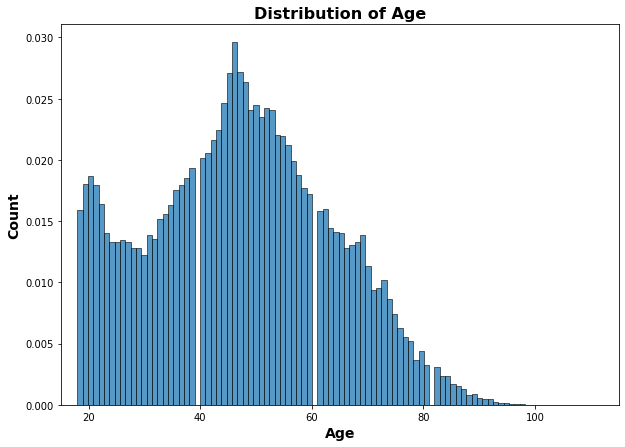

In [135]:
## Plot distribution of current age as of EOY 2016 
plt.figure(figsize=(10,7))
ax = sns.histplot(elec_2016_df['birth_age_adj'], stat='density')
ax.set_title('Distribution of Age', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlim(15,115);

### 2016 Bin Age into Generation Categories

In [136]:
## Create a a new column grouping birth_year into generations
elec_2016_df['generation'] = elec_2016_df['birth_year'].apply(get_generation)
check_unique('generation', elec_2016_df)

,count,%
GenX,42965,34.87
Boomer,38332,31.11
Millennial,27377,22.22
Silent,10414,8.45
GenZ,3994,3.24
Greatest,140,0.11


In [137]:
## Create a new column grouping birth_year into generations, 
  ## also lumping Silent in with Greatest
elec_2016_df['gen_grp'] = elec_2016_df['birth_year'].apply(get_gen_grp)
check_unique('gen_grp', elec_2016_df)

,count,%
GenX,42965,34.87
Boomer,38332,31.11
Millennial,27377,22.22
Greatest-Silent,10554,8.57
GenZ,3994,3.24


### 2016 Load in Full Clean Dataset

In [138]:
## Import and preview dataset
elec_2016_df = pd.read_csv('Data/UC_gen_2016_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'vtd_abbrv': str
                             })
elec_2016_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2016,vote_early,vote_by_mail,vote_curbside,Pri_2016,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin,vote_cat,Gen_2016_binary,Pri_2016_binary,party_grp,race_grp,city_grp,birth_reg_other,generation,gen_grp
0,AA100547,0,61.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,M,1955,2014-03-31,W,UN,28079.0,5514 BEVERLY DR,INDIAN TRAIL,NC,Y,016,016,9.0,20B,20C,35.0,69.0,4.0,1,Early,1,0,Rep,White,Indian Trail,South,Boomer,Boomer
1,AA108801,0,53.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,UNA,M,1963,2016-11-04,W,NL,28173.0,4221 OXFORD MILL RD,WAXHAW,MA,Y,020B,020B,9.0,20B,20C,35.0,68.0,6.0,1,Early,1,0,Other,White,Waxhaw,Northeast,Boomer,Boomer
2,AA112504,0,68.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0,1,Early,1,0,Rep,White,Monroe,Northeast,Boomer,Boomer
3,AA114763,0,49.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0,1,Early,1,1,Dem,Black,Matthews,South,GenX,GenX
4,AA118202,0,44.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0,1,Early,1,0,Dem,White,Indian Trail,Northeast,GenX,GenX


### 2016 Registered Voter Population Summary

In [139]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'Gen_2016',
              title='Distribution of Voting Methods in 2016 Election'))

In [140]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'Gen_2016',
              title='Voting Methods in 2016 Election'))

In [141]:
if show_plotly:
    fig = px.histogram(elec_2016_df, x='birth_age_adj', nbins=50,
                       title='Distribution of Registered Voters by Age in 2016 Election',
                       labels={'birth_age_adj': 'Age'},
                       template='seaborn'
                      )
    
    fig.show()

In [142]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'gen_grp',
              title='Distribution of Registered Voters by Generation in 2016 Election'))

In [143]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'gen_grp',
              title='Registered Voters by Generation in 2016 Election'))

In [144]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'party_grp',
              title='Distribution of Registered Voters by Party Affiliation in 2016 Election'))

In [145]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'party_grp',
              title='Registered Voters by Party Affiliation in 2016 Election'))

In [146]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'race_grp',
              title='Distribution of Registered Voters by Race in 2016 Election'))

In [147]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'race_grp',
              title='Registered Voters by Race in 2016 Election'))

In [148]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'gender_code',
              title='Distribution of Registered Voters by Gender in 2016 Election'))

In [149]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'gender_code',
              title='Registered Voters by Gender in 2016 Election'))

In [150]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'birth_reg_other',
              title='Distribution of Registered Voters by Birth Region in 2016 Election'))

In [151]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'birth_reg_other',
              title='Registered Voters by Birth Region in 2016 Election'))

In [152]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'drivers_lic',
              title='Distribution of Registered Voters by Drivers License Possession in 2016 Election'))

In [153]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'drivers_lic',
              title='Possession of Drivers License by Registered Voters in 2016 Election'))

In [154]:
if show_plotly:
    display(basic_px_hist(elec_2016_df, 2016, 'city_grp',
              title='Distribution of Registered Voters by City in 2016 Election'))

In [155]:
if show_plotly:
    display(basic_pie(elec_2016_df, 2016, 'city_grp',
              title='Registered Voters by City in 2016 Election'))

### 2016 Relationship to Voting Method

#### 2016 By Age

In [156]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'birth_age_adj', 'Gen_2016', 
            title='Distribution of Voter Age by Voting Method in 2016 Election'))

In [157]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'gen_grp', 'Gen_2016', 
            title='Voting Method by Generation'))

In [158]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gen_grp', 'Early',
              title='Early Voters by Generation'))

In [159]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gen_grp', 'Election Day',
              title='Election Day Voters by Generation'))

In [160]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gen_grp', 'No Vote',
              title='Non-Voters by Generation'))

In [161]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gen_grp', 'Other',
              title='Provisional/ Transfer Voters by Generation'))

In [162]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gen_grp', 'Gen_2016', 'GenZ',
              title='Votes by Gen Z'))

In [163]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gen_grp', 'Gen_2016', 'Millennial',
              title='Votes by Millennials'))

In [164]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gen_grp', 'Gen_2016', 'GenX',
              title='Votes by Generation X'))

In [165]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gen_grp', 'Gen_2016', 'Boomer',
              title='Votes by Baby Boomers'))

In [166]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gen_grp', 'Gen_2016', 'Greatest-Silent',
              title='Votes by Greatest and Silent Generation'))

#### 2016 By Party

In [167]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'Gen_2016', 'party_grp', 
            title='Voting Method by Party'))

In [168]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'party_grp', 'Early',
              title='Early Voters by Party'))

In [169]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'party_grp', 'Election Day',
              title='Election Day Voters by Party'))

In [170]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'party_grp', 'No Vote',
              title='Non-Voters by Party'))

In [171]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'party_grp', 'Other',
              title='Provisional/ Transfer Voters by Party'))

In [172]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'party_grp', 'Gen_2016', 'Dem',
              title='Votes by Democratic Party'))

In [173]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'party_grp', 'Gen_2016', 'Rep',
              title='Votes by Republican Party'))

In [174]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'party_grp', 'Gen_2016', 'Other',
              title='Votes by Other Voters'))

#### 2016 By Race

In [175]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'Gen_2016', 'race_grp',
            title='Voting Method by Race'))

In [176]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'race_grp', 'Early',
              title='Early Voters by Race'))

In [177]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'race_grp', 'Election Day',
              title='Election Day Voters by Race'))

In [178]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'race_grp', 'No Vote',
              title='Non-Voters by Race'))

In [179]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'race_grp', 'Other',
              title='Provisional/ Transfer Voters by Race'))

In [180]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'race_grp', 'Gen_2016', 'White',
              title='Votes by White Voters'))

In [181]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'race_grp', 'Gen_2016', 'Black',
              title='Votes by Black Voters'))

In [182]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'race_grp', 'Gen_2016', 'Undesig.',
              title='Votes by Voters of Undesignated Race'))

In [183]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'race_grp', 'Gen_2016', 'Other',
              title='Votes by Voters of Other Racial Backgrounds'))

#### 2016 By Gender

In [184]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'Gen_2016', 'gender_code', 
            title='Voting Method by Gender'))

In [185]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gender_code', 'Early',
              title='Early Voters by Gender'))

In [186]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gender_code', 'Election Day',
              title='Election Day Voters by Gender'))

In [187]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gender_code', 'No Vote',
                    title='Non-Voters by Gender'))

In [188]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gender_code', 'Other',
              title='Provisional/ Transfer Voters by Gender'))

In [189]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gender_code', 'Gen_2016', 'F',
              title='Votes by Women'))

In [190]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gender_code', 'Gen_2016', 'M',
              title='Votes by Men'))

In [191]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gender_code', 'Gen_2016', 'U',
              title='Votes by Voters of Undesignated Gender'))

In [192]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'gender_code', 'Other',
              title='Provisional/ Transfer Voters by Gender'))

In [193]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gender_code', 'Gen_2016', 'F',
              title='Votes by Women'))

In [194]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gender_code', 'Gen_2016', 'M',
              title='Votes by Men'))

In [195]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'gender_code', 'Gen_2016', 'U',
              title='Votes by Voters of Undesignated Gender'))

#### 2016 By Birth Region

In [196]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'Gen_2016', 'birth_reg_other', 
            title='Voting Method by Birth Region'))

In [197]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'birth_reg_other', 'Early',
              title='Early Voters by Birth Region'))

In [198]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'birth_reg_other', 'Election Day',
              title='Election Day Voters by Birth Region'))

In [199]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'birth_reg_other', 'No Vote',
              title='Non-Voters by Birth Region'))

In [200]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'birth_reg_other', 'Other',
              title='Provisional/ Transfer Voters by Birth Region'))

In [201]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'birth_reg_other', 'Gen_2016', 'South',
              title='Votes by Voters from the South'))

In [202]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'birth_reg_other', 'Gen_2016', 'Missing',
              title='Votes by Voters with Missing Birth Region'))

In [203]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'birth_reg_other', 'Gen_2016', 'Northeast',
              title='Votes by Voters from the Northeast'))

In [204]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'birth_reg_other', 'Gen_2016', 'Midwest',
              title='Votes by Voters from the Midwest'))

In [205]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'birth_reg_other', 'Gen_2016', 'Other',
              title='Votes by Voters Born in U.S. Territories or Outside the U.S.'))

In [206]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'birth_reg_other', 'Gen_2016', 'West',
              title='Votes by Voters from the West'))

#### 2016 By Possessing a Drivers License

In [207]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'Gen_2016', 'drivers_lic', 
            title='Voting Method by Voters with and without Drivers Licenses'))

In [208]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'drivers_lic', 'Early',
              title='Early Voters by Possession of Drivers License'))

In [209]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'drivers_lic', 'Election Day',
              title='Election Day Voters by Possession of Drivers License'))

In [210]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'drivers_lic', 'No Vote',
              title='Non-Voters by Possession of Drivers License'))

In [211]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'drivers_lic', 'Other',
              title='Provisional/ Transfer Voters by Possession of Drivers License'))

In [212]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'drivers_lic', 'Gen_2016', 'Y',
              title='Votes by People with a Drivers License'))

In [213]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'drivers_lic', 'Gen_2016', 'N',
              title='Votes by People with No Drivers License'))

#### 2016 By City

In [214]:
if show_plotly:
    display(grp_px_hist(elec_2016_df, 2016, 'Gen_2016', 'city_grp', 
            title='Voting Method by City of Residence'))

In [215]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'city_grp', 'Early',
              title='Early Voters by City of Residence'))

In [216]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'city_grp', 'Election Day',
              title='Election Day Voters by City of Residence'))

In [217]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'city_grp', 'No Vote',
              title='Non-Voters by City of Residence'))

In [218]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'Gen_2016', 'city_grp', 'Other',
              title='Provisional/ Transfer Voters by City of Residence'))

In [219]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'city_grp', 'Gen_2016', 'Monroe',
              title='Votes by Residents of Monroe'))

In [220]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'city_grp', 'Gen_2016', 'Waxhaw',
              title='Votes by Residents of Waxhaw'))

In [221]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'city_grp', 'Gen_2016', 'Indian Trail',
              title='Votes by Residents of Indian Trail'))

In [222]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'city_grp', 'Gen_2016', 'Matthews',
              title='Votes by Residents of Matthews'))

In [223]:
if show_plotly:
    display(grp_pie(elec_2016_df, 2016, 'city_grp', 'Gen_2016', 'Other',
              title='Votes from Other Cities in Union County'))

## Explore 2012 Election

### 2012 Categorical Variables

In [224]:
check_unique('voting_method', elec_2012_df)

,count,%
ABSENTEE ONESTOP,49387,51.30
IN-PERSON,31793,33.02
No Vote,9781,10.16
ABSENTEE BY MAIL,4251,4.42
TRANSFER,619,0.64
PROVISIONAL,386,0.40
CURBSIDE,58,0.06


In [225]:
## Group original vote methods into more general categories in a new variable
 # Map the original categories to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Mail',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day',
                   'No Vote': 'No Vote'}

# Apply the map to create new vote_method_cat column
elec_2012_df['vote_cat'] = elec_2012_df['voting_method'].map(vote_method_map)

check_unique('vote_cat', elec_2012_df)

,count,%
Early,49387,51.30
Election Day,31851,33.08
No Vote,9781,10.16
Mail,4251,4.42
Other,1005,1.04


In [226]:
check_unique('Gen_2012', elec_2012_df)

,count,%
Early,53638,55.71
Election Day,31851,33.08
No Vote,9781,10.16
Other,1005,1.04


> The 'Other' category is made up of only 1005 individuals that voted with either a provisional or transfer ballot. Need to consider dropping this extremely rare category or somehow adding those records into one of the other categories.

In [227]:
check_unique('Pri_2012', elec_2012_df)

,count,%
No Vote,60177,62.51
Election Day,27764,28.84
Early,7819,8.12
Other,515,0.53


> 'Other' category also extremely rare for `Pri_2012` as well. If this is used as a predictor, consider changing to a binary variable indicating simply whether or not the person voted in the Primary.

In [228]:
check_unique('party_cd', elec_2012_df)

,count,%
REP,43658,45.35
UNA,28162,29.25
DEM,24062,24.99
LIB,358,0.37
CST,29,0.03
GRE,6,0.01


> LIB, CST, and GRE extremely rare within the county. Need to deal with this in some way, but grouping into a single 'Rare' category won't necessarily solve the issue since that would still represent barely more than 0.5% of voters in this election. It could make sense to combine these three parties with UNA (unaffiliated) to simply represent voters that do not align with one of the two major parties.

In [229]:
check_unique('gender_code', elec_2012_df)

,count,%
F,50072,52.01
M,42527,44.17
U,3676,3.82


In [230]:
check_unique('race_code', elec_2012_df)

,count,%
W,75603,78.53
B,12028,12.49
U,4927,5.12
O,2072,2.15
A,1028,1.07
M,385,0.40
I,230,0.24
P,2,0.00


> The most infrequent categories (Other, Asian, Multiple, Native American, Pacific Islander/Native Hawaiian) each represent less than 5% of voters. To deal with these rare labels, it is probably best from a modeling standpoint to group them all under 'Other'.

In [231]:
check_unique('ethnic_code', elec_2012_df)

,count,%
NL,78235,81.26
UN,15734,16.34
HL,2306,2.40


> Voters that chose to identify themselves as Hispanic or Latino represent less than 5% of voters. Check below to see how disclosed racial and ethnic identities intersect.

In [232]:
## Investigate how race intersects with ethnic code
for code in elec_2012_df['ethnic_code'].unique():
    print('*****{}*****'.format(code))
    display(elec_2012_df.loc[elec_2012_df['ethnic_code']==code]['race_code'].value_counts().to_frame())
    print()

*****NL*****


,race_code
W,66562
B,9631
O,815
A,708
I,188
M,169
U,162



*****UN*****


,race_code
W,8443
U,4311
B,2363
A,315
O,150
M,109
I,41
P,2



*****HL*****


,race_code
O,1107
W,598
U,454
M,107
B,34
A,5
I,1


> Patterns of intersection between race and ethnicity are somewhat unclear. The majority of voters that chose not to disclose their ethnicity were white (8,443 out of 15,734). The majority of voters that identified themselves as Hispanic or Latino when registering listed their race as 'Other'(1,107 out of 2,306), with the next most frequent category being 'White' (598 out of 2,306), then 'Undesignated' (454 out of 2,306). As such, I am uncertain how useful this feature will be as a predictor, especially given that the 'HL' category is so rare.

In [233]:
check_unique('zip_code', elec_2012_df)

,count,%
28173.0,24451,25.40
28110.0,20868,21.68
28079.0,15719,16.33
28104.0,14860,15.43
28112.0,11550,12.00
28103.0,4944,5.14
28174.0,3346,3.48
28227.0,236,0.25
28105.0,141,0.15
28133.0,105,0.11


> Six of the 12 zip codes are rare labels (each representing less than 5% of the voters). It may be best to use grouped cities as a predictor (see immediately below) rather than zip codes, especially since the two will be highly correlated.

In [234]:
check_unique('res_city_desc', elec_2012_df)

,count,%
MONROE,32418,33.67
WAXHAW,24451,25.40
INDIAN TRAIL,15719,16.33
MATTHEWS,15001,15.58
MARSHVILLE,4944,5.14
WINGATE,3346,3.48
CHARLOTTE,236,0.25
PEACHLAND,105,0.11
MIDLAND,51,0.05
POLKTON,2,0.00


> There are several rare labels, so if `res_city_desc` is to be used as a predictor, cities besides Monroe, Waxhaw, Indian Trail, and Matthews should probably be combined into an 'Other' category.

In [235]:
check_unique('birth_state', elec_2012_df)

,count,%
NC,28514,29.62
Missing,24857,25.82
NY,7114,7.39
OC,4253,4.42
SC,3020,3.14
OH,2596,2.70
PA,2577,2.68
NJ,2348,2.44
FL,1847,1.92
VA,1735,1.80


> The majority of `birth_state` labels are rare categories (less than 5% of voters). Some of the codes do not appear to be U.S. states or territories. These rare labels could be dealt with in a couple ways. They could all be grouped into an 'Other' category, or they could be grouped according to geographic region of the U.S. with an additional category for naturalized U.S. citizens.

In [236]:
check_unique('drivers_lic', elec_2012_df)

,count,%
Y,89060,92.51
N,7215,7.49


### 2012 Group Rare Categories

In [237]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2012 election or not
elec_2012_df['Gen_2012_binary'] = np.where(elec_2012_df['Gen_2012']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Gen_2012_binary', elec_2012_df)

,count,%
1,86494,89.84
0,9781,10.16


In [238]:
## Create new column that is a binary variable indicating whether the voter
  ## cast a vote in the 2012 election or not
elec_2012_df['Pri_2012_binary'] = np.where(elec_2012_df['Pri_2012']=='No Vote',
                                0, 1)

## Check distribution
check_unique('Pri_2012_binary', elec_2012_df)

,count,%
0,60177,62.51
1,36098,37.49


In [239]:
## Create new column grouping most infrequent party categories (<5% of voters)
  ## into same group as those who are unaffiliated
elec_2012_df['party_grp'] = np.where(elec_2012_df['party_cd'].isin(['REP', 'DEM']),
                                elec_2012_df['party_cd'].str.title(), 'Other')

## Check distribution
check_unique('party_grp', elec_2012_df)

,count,%
Rep,43658,45.35
Other,28555,29.66
Dem,24062,24.99


In [240]:
## Create new column grouping most infrequent race categories (<5% of voters)
elec_2012_df['race_grp'] = np.where(elec_2012_df['race_code'].isin(['W', 'B', 'U']),
                               elec_2012_df['race_code'], 'O')
race_grp_map = {'W': 'White',
                'B': 'Black',
                'U': 'Undesig.',
                'O': 'Other'}
elec_2012_df['race_grp'] = elec_2012_df['race_grp'].map(race_grp_map)

## Check distribution
check_unique('race_grp', elec_2012_df)

,count,%
White,75603,78.53
Black,12028,12.49
Undesig.,4927,5.12
Other,3717,3.86


In [241]:
## Create new column grouping most infrequent cities (<5% of voters)
elec_2012_df['city_grp'] = np.where(elec_2012_df['res_city_desc'].isin(['MONROE', 
                                                              'WAXHAW',
                                                              'INDIAN TRAIL',
                                                              'MATTHEWS']),
                                elec_2012_df['res_city_desc'].str.title(), 'Other')

## Check distribution
check_unique('city_grp', elec_2012_df)

,count,%
Monroe,32418,33.67
Waxhaw,24451,25.40
Indian Trail,15719,16.33
Matthews,15001,15.58
Other,8686,9.02


In [242]:
## Create a new column grouping birth_state into U.S. Census regions,
  ## this time lumping territories and out of country into 'Other'
elec_2012_df['birth_reg_other'] = elec_2012_df['birth_state'].apply(get_birth_reg_census_other)
check_unique('birth_reg_other', elec_2012_df)

,count,%
South,42412,44.05
Missing,24858,25.82
Northeast,14128,14.67
Midwest,7743,8.04
Other,4453,4.63
West,2681,2.78


### 2012 Numeric Variables

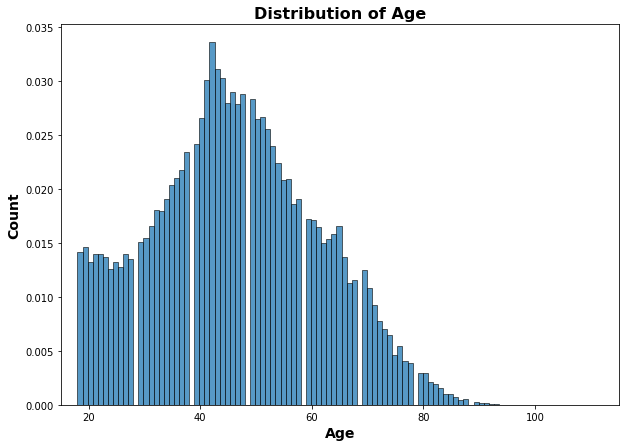

In [243]:
## Plot distribution of current age as of EOY 2012 
plt.figure(figsize=(10,7))
ax = sns.histplot(elec_2012_df['birth_age_adj'], stat='density')
ax.set_title('Distribution of Age', fontsize=16, weight='bold')
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
ax.set_xlim(15,115);

### 2012 Bin Age into Generation Categories

In [244]:
## Create a a new column grouping birth_year into generations
elec_2012_df['generation'] = elec_2012_df['birth_year'].apply(get_generation)
check_unique('generation', elec_2012_df)

,count,%
GenX,35250,36.61
Boomer,34082,35.40
Millennial,17234,17.90
Silent,9585,9.96
Greatest,124,0.13


In [245]:
## Create a new column grouping birth_year into generations, 
  ## also lumping Silent in with Greatest
elec_2012_df['gen_grp'] = elec_2012_df['birth_year'].apply(get_gen_grp)
check_unique('gen_grp', elec_2012_df)

,count,%
GenX,35250,36.61
Boomer,34082,35.40
Millennial,17234,17.90
Greatest-Silent,9709,10.08


### 2012 Load in Full Clean Dataset

In [246]:
## Import and preview dataset
elec_2012_df = pd.read_csv('Data/UC_gen_2012_clean.gz',
                     dtype={'precinct_abbrv': str, 
                            'vtd_abbrv': str
                             })
elec_2012_df.head()

,ncid,no_vote_his,birth_age_adj,voting_method,Gen_2012,vote_early,vote_by_mail,vote_curbside,Pri_2012,party_cd,gender_code,birth_year,registr_dt,race_code,ethnic_code,zip_code,res_street_address,res_city_desc,birth_state,drivers_lic,precinct_abbrv,vtd_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,drivers_lic_bin,vote_cat,Gen_2012_binary,Pri_2012_binary,party_grp,race_grp,city_grp,birth_reg_other,generation,gen_grp
0,AA109481,0,39.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,Election Day,DEM,F,1973,2020-03-19,W,NL,28173.0,1013 LYDNEY CIR,WAXHAW,MN,Y,020A,020A,9.0,20B,20C,35.0,68.0,2.0,1,Early,1,1,Dem,White,Waxhaw,Midwest,GenX,GenX
1,AA112504,0,64.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,REP,F,1948,2012-10-26,W,NL,28112.0,4325 WOLF POND RD,MONROE,NY,Y,024,024,9.0,20B,20C,35.0,55.0,2.0,1,Early,1,0,Rep,White,Monroe,Northeast,Boomer,Boomer
2,AA114763,0,45.0,ABSENTEE ONESTOP,Early,1.0,0.0,0.0,No Vote,DEM,F,1967,2012-08-13,B,UN,28104.0,4002 LAWRENCE DANIEL DR,MATTHEWS,NC,Y,037A,037A,9.0,20B,20C,35.0,69.0,5.0,1,Early,1,0,Dem,Black,Matthews,South,GenX,GenX
3,AA116927,0,50.0,IN-PERSON,Election Day,0.0,0.0,0.0,Election Day,REP,M,1962,2018-08-06,W,NL,28173.0,3513 MCPHERSON ST,WAXHAW,NY,Y,028D,028,9.0,20B,20C,35.0,68.0,6.0,1,Election Day,1,1,Rep,White,Waxhaw,Northeast,Boomer,Boomer
4,AA118202,0,40.0,IN-PERSON,Election Day,0.0,0.0,0.0,No Vote,DEM,M,1972,2006-04-12,W,UN,28079.0,7006 CONIFER CIR,INDIAN TRAIL,CT,Y,038B,038B,9.0,20B,20C,35.0,69.0,4.0,1,Election Day,1,0,Dem,White,Indian Trail,Northeast,GenX,GenX


### 2012 Registered Voter Population Summary

In [247]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'Gen_2012',
              title='Distribution of Voting Methods in 2012 Election'))

In [248]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'Gen_2012',
              title='Voting Methods in 2012 Election'))

In [249]:
if show_plotly:
    fig = px.histogram(elec_2012_df, x='birth_age_adj', nbins=50,
                       title='Distribution of Registered Voters by Age in 2012 Election',
                       labels={'birth_age_adj': 'Age'},
                       template='seaborn'
                      )
    
    fig.show()

In [250]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'gen_grp',
              title='Distribution of Registered Voters by Generation in 2012 Election'))

In [251]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'gen_grp',
              title='Registered Voters by Generation in 2012 Election'))

In [252]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'party_grp',
              title='Distribution of Registered Voters by Party Affiliation in 2012 Election'))

In [253]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'party_grp',
              title='Registered Voters by Party Affiliation in 2012 Election'))

In [254]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'race_grp',
              title='Distribution of Registered Voters by Race in 2012 Election'))

In [255]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'race_grp',
              title='Registered Voters by Race in 2012 Election'))

In [256]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'gender_code',
              title='Distribution of Registered Voters by Gender in 2012 Election'))

In [257]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'gender_code',
              title='Registered Voters by Gender in 2012 Election'))

In [258]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'birth_reg_other',
              title='Distribution of Registered Voters by Birth Region in 2012 Election'))

In [259]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'birth_reg_other',
              title='Registered Voters by Birth Region in 2012 Election'))

In [260]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'drivers_lic',
              title='Distribution of Registered Voters by Drivers License Possession in 2012 Election'))

In [261]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'drivers_lic',
              title='Possession of Drivers License by Registered Voters in 2012 Election'))

In [262]:
if show_plotly:
    display(basic_px_hist(elec_2012_df, 2012, 'city_grp',
              title='Distribution of Registered Voters by City in 2012 Election'))

In [263]:
if show_plotly:
    display(basic_pie(elec_2012_df, 2012, 'city_grp',
              title='Registered Voters by City in 2012 Election'))

### 2012 Relationship to Voting Method

#### 2012 By Age

In [264]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'birth_age_adj', 'Gen_2012', 
            title='Distribution of Voter Age by Voting Method in 2012 Election'))

In [265]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'gen_grp', 'Gen_2012', 
            title='Voting Method by Generation'))

In [266]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gen_grp', 'Early',
              title='Early Voters by Generation'))

In [267]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gen_grp', 'Election Day',
              title='Election Day Voters by Generation'))

In [268]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gen_grp', 'No Vote',
              title='Non-Voters by Generation'))

In [269]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gen_grp', 'Other',
              title='Provisional/ Transfer Voters by Generation'))

In [270]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gen_grp', 'Gen_2012', 'Millennial',
              title='Votes by Millennials'))

In [271]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gen_grp', 'Gen_2012', 'GenX',
              title='Votes by Generation X'))

In [272]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gen_grp', 'Gen_2012', 'Boomer',
              title='Votes by Baby Boomers'))

In [273]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gen_grp', 'Gen_2012', 'Greatest-Silent',
              title='Votes by Greatest and Silent Generation'))

#### 2012 By Party

In [274]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'Gen_2012', 'party_grp', 
            title='Voting Method by Party'))

In [275]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'party_grp', 'Early',
              title='Early Voters by Party'))

In [276]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'party_grp', 'Election Day',
              title='Election Day Voters by Party'))

In [277]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'party_grp', 'No Vote',
              title='Non-Voters by Party'))

In [278]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'party_grp', 'Other',
              title='Provisional/ Transfer Voters by Party'))

In [279]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'party_grp', 'Gen_2012', 'Dem',
              title='Votes by Democratic Party'))

In [280]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'party_grp', 'Gen_2012', 'Rep',
              title='Votes by Republican Party'))

In [281]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'party_grp', 'Gen_2012', 'Other',
              title='Votes by Other Voters'))

#### 2012 By Race

In [282]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'Gen_2012', 'race_grp',
            title='Voting Method by Race'))

In [283]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'race_grp', 'Early',
              title='Early Voters by Race'))

In [284]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'race_grp', 'Election Day',
              title='Election Day Voters by Race'))

In [285]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'race_grp', 'No Vote',
              title='Non-Voters by Race'))

In [286]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'race_grp', 'Other',
              title='Provisional/ Transfer Voters by Race'))

In [287]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'race_grp', 'Gen_2012', 'White',
              title='Votes by White Voters'))

In [288]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'race_grp', 'Gen_2012', 'Black',
              title='Votes by Black Voters'))

In [289]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'race_grp', 'Gen_2012', 'Undesig.',
              title='Votes by Voters of Undesignated Race'))

In [290]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'race_grp', 'Gen_2012', 'Other',
              title='Votes by Voters of Other Racial Backgrounds'))

#### 2012 By Gender

In [291]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'Gen_2012', 'gender_code', 
            title='Voting Method by Gender'))

In [292]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gender_code', 'Early',
              title='Early Voters by Gender'))

In [293]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gender_code', 'Election Day',
              title='Election Day Voters by Gender'))

In [294]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gender_code', 'No Vote',
              title='Non-Voters by Gender'))

In [295]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'gender_code', 'Other',
              title='Provisional/ Transfer Voters by Gender'))

In [296]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gender_code', 'Gen_2012', 'F',
              title='Votes by Women'))

In [297]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gender_code', 'Gen_2012', 'M',
              title='Votes by Men'))

In [298]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'gender_code', 'Gen_2012', 'U',
              title='Votes by Voters of Undesignated Gender'))

#### 2012 By Birth Region

In [299]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'Gen_2012', 'birth_reg_other', 
            title='Voting Method by Birth Region'))

In [300]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'birth_reg_other', 'Early',
              title='Early Voters by Birth Region'))

In [301]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'birth_reg_other', 'Election Day',
              title='Election Day Voters by Birth Region'))

In [302]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'birth_reg_other', 'No Vote',
              title='Non-Voters by Birth Region'))

In [303]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'birth_reg_other', 'Other',
              title='Provisional/ Transfer Voters by Birth Region'))

In [304]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'birth_reg_other', 'Gen_2012', 'South',
              title='Votes by Voters from the South'))

In [305]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'birth_reg_other', 'Gen_2012', 'Missing',
              title='Votes by Voters with Missing Birth Region'))

In [306]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'birth_reg_other', 'Gen_2012', 'Northeast',
              title='Votes by Voters from the Northeast'))

In [307]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'birth_reg_other', 'Gen_2012', 'Midwest',
              title='Votes by Voters from the Midwest'))

In [308]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'birth_reg_other', 'Gen_2012', 'Other',
              title='Votes by Voters Born in U.S. Territories or Outside the U.S.'))

In [309]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'birth_reg_other', 'Gen_2012', 'West',
              title='Votes by Voters from the West'))

#### 2012 By Possessing a Drivers License

In [310]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'Gen_2012', 'drivers_lic', 
            title='Voting Method by Voters with and without Drivers Licenses'))

In [311]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'drivers_lic', 'Early',
              title='Early Voters by Possession of Drivers License'))

In [312]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'drivers_lic', 'Election Day',
              title='Election Day Voters by Possession of Drivers License'))

In [313]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'drivers_lic', 'No Vote',
              title='Non-Voters by Possession of Drivers License'))

In [314]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'drivers_lic', 'Other',
              title='Provisional/ Transfer Voters by Possession of Drivers License'))

In [315]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'drivers_lic', 'Gen_2012', 'Y',
              title='Votes by People with a Drivers License'))

In [316]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'drivers_lic', 'Gen_2012', 'N',
              title='Votes by People with No Drivers License'))

#### 2012 By City

In [317]:
if show_plotly:
    display(grp_px_hist(elec_2012_df, 2012, 'Gen_2012', 'city_grp', 
            title='Voting Method by City of Residence'))

In [318]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'city_grp', 'Early',
              title='Early Voters by City of Residence'))

In [319]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'city_grp', 'Election Day',
              title='Election Day Voters by City of Residence'))

In [320]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'city_grp', 'No Vote',
              title='Non-Voters by City of Residence'))

In [321]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'Gen_2012', 'city_grp', 'Other',
              title='Provisional/ Transfer Voters by City of Residence'))

In [322]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'city_grp', 'Gen_2012', 'Monroe',
              title='Votes by Residents of Monroe'))

In [323]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'city_grp', 'Gen_2012', 'Waxhaw',
              title='Votes by Residents of Waxhaw'))

In [324]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'city_grp', 'Gen_2012', 'Indian Trail',
              title='Votes by Residents of Indian Trail'))

In [325]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'city_grp', 'Gen_2012', 'Matthews',
              title='Votes by Residents of Matthews'))

In [326]:
if show_plotly:
    display(grp_pie(elec_2012_df, 2012, 'city_grp', 'Gen_2012', 'Other',
              title='Votes from Other Cities in Union County'))